# Análise Exploratória dos Dados - Depósito de Ouro (Au) e Cobre (Cu)

- Os dados deste trabalho compreendem teores de **Au** e **Cu** amostrados em superfície;
- O presente dataset é **fictício**, **bidimensional** e **georreferenciado**;
- As coordenadas **X** e **Y** são apresentadas em um **sistema de coordenadas interno**;
- O objetivo deste exercício é realizar a **análise exploratória** do dataset de forma simplificada, utilizando os conhecimentos adquiridos no curso de introdução à Ciência de Dados **"Quarentena** **Dados"**. 

## Importação das bibliotecas

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import matplotlib.pyplot as plt

## Considerações Iniciais

- O dataset apresenta um total de **268 amostras**;
- O dataframe apresenta **268 linhas** e **4 colunas**;
- As colunas são representadas pelos atributos 'X', 'Y', 'CU' e 'AU':
  - **X** = coordenada interna X;
  - **Y** = coordenada interna Y;
  - **CU** = teores de Cu em %;
  - **AU** = teores de Au em ppm;
- O dataframe apresenta **agrupamento preferencial de amostras** (dados "clusterizados");
- O dataframe não apresenta valores faltantes e o contexto do depósito é, portanto, **isotópico**.

In [0]:
# Carregando o dataset via Pandas
uri = 'https://raw.githubusercontent.com/fnaghetini/My-Study-Projects/master/EDA_Au_Cu_dataset.csv'
df = pd.read_csv (uri)
# Número de linhas e colunas do dataframe
print (df.shape)
# Visualização das 5 primeiras linhas do dataframe
df.head ()

(268, 4)


,X,Y,CU,AU
0,40.0,71.0,0.762,0.0011
1,21.0,69.0,2.843,0.0078
2,28.0,80.0,6.068,0.1053
3,29.0,59.0,7.727,1.5127
4,41.0,81.0,2.695,0.0098


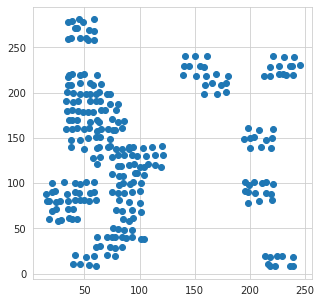

In [0]:
# Distribuição espacial das amostras
X = df.X
Y = df.Y

sns.set_style ("whitegrid" )
plt.figure (figsize= (5, 5))
plt.scatter(X, Y)
plt.show()

In [0]:
# Verificação de valores faltantes
print (df.AU.isnull ().value_counts ())
print (df.CU.isnull ().value_counts ())
print (df.X.isnull ().value_counts ())
print (df.Y.isnull ().value_counts ())

False    268
Name: AU, dtype: int64
False    268
Name: CU, dtype: int64
False    268
Name: X, dtype: int64
False    268
Name: Y, dtype: int64


## Análise Estatística Univariada

### Sumário Estatístico

- Os teores de **Cu (%)** apresentam magnitude quase **10 vezes maior** que os teores de **Au (ppm)**, em média;
- Há uma diferença significativa entre a **média** e a **mediana** dos teores de **Au**, de maneira que a primeira medida é quase **duas vezes maior** que a segunda;
- As **medidas de tendência central** (i.e. média e mediana) dos teores de **Cu** são relativamente **similares**;
- O **desvio padrão** dos teores de **Cu** é maior que essa mesma medida dos teores de **Au**;
- O **desvio padrão** dos teores de **Au** é **maior** que a **média** desses valores;
- O teor **máximo** de **Au** é quase **6 vezes maior** que o **quartil superior** dessa variável;
- O teor **máximo** de **Cu** é  **2 vezes maior** que o **quartil superior** dessa variável.

In [0]:
# Obtenção do sumário estatístico para as variáveis Au e Cu
df [['AU', 'CU']].describe ()

,AU,CU
count,268.000000,268.000000
mean,0.619859,5.624761
std,0.771060,2.702377
min,0.000100,0.130000
25%,0.095100,3.810000
50%,0.349200,5.762500
75%,0.878100,7.345250
max,5.190100,15.281000


### IQR

- O IQR do Cu é **maior** que o IQR do Au.

In [0]:
iqr_au = df.AU.quantile (.75) - df.AU.quantile (.25)
iqr_cu = df.CU.quantile (.75) - df.CU.quantile (.25)
print ('IQR (Au) = ', iqr_au.round (2))
print ('IQR (Cu) = ', iqr_cu.round (2))

IQR (Au) =  0.78
IQR (Cu) =  3.54


### IQR/mediana

- O IQR "standardizado" do Au é **maior** do que o do Cu.

In [0]:
iqr_m_au = iqr_au / df.AU.median ()
iqr_m_cu = iqr_cu / df.CU.median ()
print ('IQR/mediana (Au) = ', iqr_m_au.round (2))
print ('IQR/mediana (Cu) = ', iqr_m_cu.round (2))

IQR/mediana (Au) =  2.24
IQR/mediana (Cu) =  0.61


### Coeficiente de Variação

- O coeficiente de variação do Au é **maior** que o do Cu.

In [0]:
cv_au = df.AU.std () / df.AU.mean ()
cv_cu = df.CU.std () / df.CU.mean ()
print (f'CV(Au) = {cv_au}')
print (f'CV(Cu) = {cv_cu}')

CV(Au) = 1.2439279899026912
CV(Cu) = 0.48044289480255165


### Medidas de Forma

#### Coeficiente de Assimetria (Skewness)

- O **coeficiente** **de** **assimetria** do **Au** é **maior** que zero;
- O **coeficiente de assimetria** do **Cu** é **próximo** de zero.


In [0]:
au_skew = df.AU.skew ().round (2)
cu_skew = df.CU.skew ().round (2)
print (f'Coef. Assimetria (Au) = {au_skew}')
print (f'Coef. Assimetria (Cu) = {cu_skew}')

Coef. Assimetria (Au) = 2.27
Coef. Assimetria (Cu) = 0.41


#### Curtosis

- A "curtosidade" da biblioteca Pandas segue a definição de Fisher, em que a curtosis de uma distribuição normal é igual a zero.
- Nesse sentido, a "curtosidade" do Cu é próxima de zero, enquanto a do Au é significativamente distante.

In [0]:
au_kur = df.AU.kurtosis ().round (2)
cu_kur = df.CU.kurtosis ().round (2)
print (f'Curtosis (Au) = {au_kur}')
print (f'Curtosis (Cu) = {cu_kur}')

Curtosis (Au) = 6.97
Curtosis (Cu) = 0.59


### Histogramas

#### Au

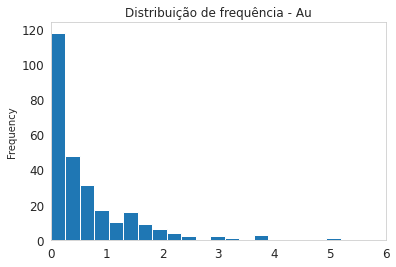

In [0]:
# Plotagem do histograma do Au
df.AU.plot (kind = 'hist', title = "Distribuição de frequência - Au",
         grid = False, xlim = (0,6), fontsize = 12, bins = 20)

plt.show ()

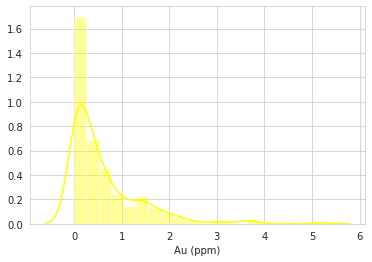

In [0]:
# Plotagem do histograma do Au juntamente com seu modelo de distribuição
sns.distplot (df.AU, bins = 20, color = 'Yellow', axlabel = 'Au (ppm)')

plt.show ()

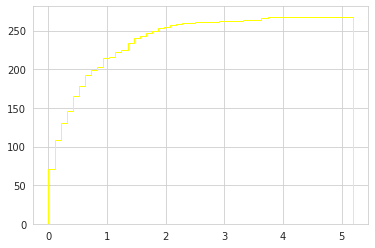

In [0]:
# Plotagem da distribuição acumulada do Au
plt.hist (df.AU, cumulative = True, histtype = 'step', color = 'Yellow', bins = 50)
plt.show ()

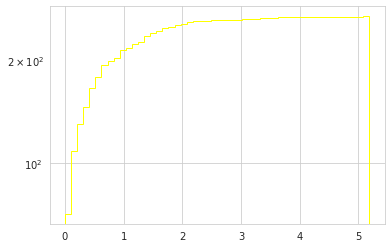

In [0]:
# Plotagem da distribuição lognormal acumulada do Au
plt.hist (df.AU, cumulative = True, histtype = 'step', color = 'Yellow', bins = 50, log = True)
plt.show ()

#### Cu

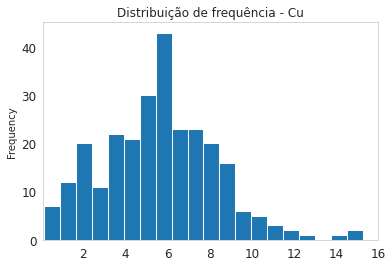

In [0]:
# Plotagem do histograma do Cu
df.CU.plot (kind = 'hist', title = "Distribuição de frequência - Cu",
         grid = False, xlim = (0.1,16), fontsize = 12, bins = 20)
plt.show ()

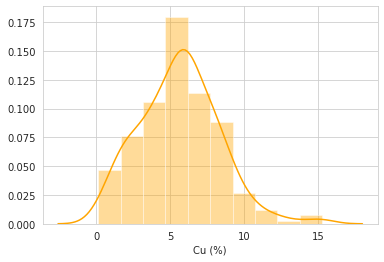

In [0]:
# Plotagem do histograma do Cu juntamente com seu modelo de distribuição
sns.distplot (df.CU, bins = 10, color = 'Orange', axlabel = 'Cu (%)')

plt.show ()

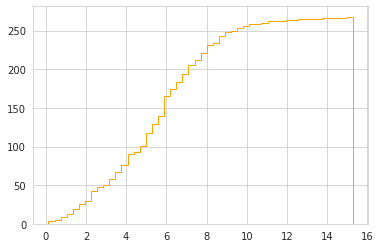

In [0]:
# Plotagem da distribuição acumulada do Cu
plt.hist (df.CU, cumulative = True, histtype = 'step', color = 'Orange', bins = 50)
plt.show ()

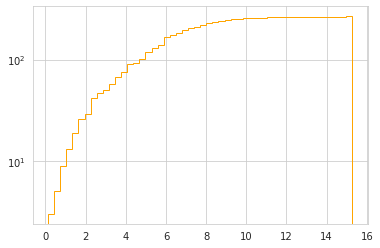

In [0]:
# Plotagem da distribuição lognormal acumulada do Cu
plt.hist (df.CU, cumulative = True, histtype = 'step', color = 'Orange', bins = 50, log = True)
plt.show ()

### Boxplots

- Os outliers calculados pela biblioteca **Seaborn** se baseiam em um método que é função da distância interquartil (IQR);
- A variável Au apresenta um maior número de outliers do que a variável Cu.

#### Au

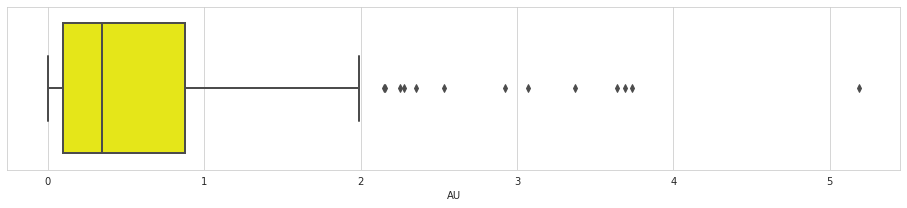

In [0]:
plt.figure (figsize= (16,3))
sns.boxplot (data = df, color = 'Yellow', orient = 'h', x = 'AU', saturation = 0.8,
             linewidth = 2)
plt.show ()

In [0]:
out_au = len (df.query ('AU > 2'))
print (f'A variável Au apresenta {out_au} outliers.' )

A variável Au apresenta 13 outliers.


#### Cu

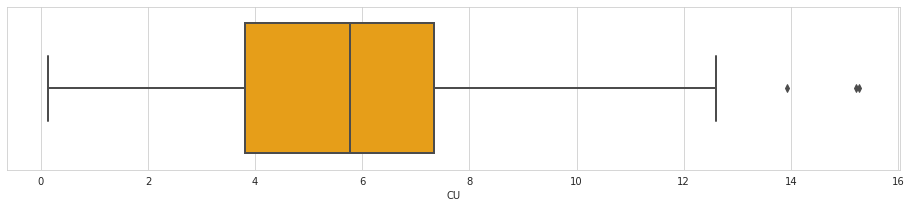

In [0]:
plt.figure (figsize= (16,3))
sns.boxplot (data = df, color = 'Orange', orient = 'h', x = 'CU', saturation = 0.8,
             linewidth = 2)
plt.show ()

In [0]:
out_cu = len (df.query ('CU > 12.5'))
print (f'A variável Cu apresenta, aproximadamente, {out_cu} outliers.')

A variável Cu apresenta, aproximadamente, 4 outliers.


### Discussão - Estatística Univariada

#### Variabilidade Au x Cu

- A partir da análise precipitada do **desvio padrão** e do **IQR** (medidas de espalhamento), diria-se que a erraticidade do Cu é maior do que a do Au, uma vez que o Cu apresenta valores maiores para essas estatísticas do que o Au;
- Entretanto, deve-se enfatizar que o **desvio padrão** é uma estatística **pouco robusta**, ou seja, é amplamente afetada pela presença de valores destoantes;
- Já o **IQR**, é uma estatística **mais robusta**, ou seja, não afetada por ouliers. No entanto, trata-se de uma medida **não portável** (assim como o desvio padrão), no sentido de ser afetado pela magnitude dos dados e, portanto, não poder ser utilizado como parâmetro de comparação da variabilidade entre duas variáveis de diferentes magnitudes;
- Como a grande discrepância entre a média e a mediana dos teores de Au alertam para a possível presença de outliers, a utilização do desvio padrão para comparar a variabilidade entre os dois metais não é aconselhável;
- Similarmente, em função da magnitude dos teores de Cu ser, em média, 10 vezes maior do que a dos teores de Au, a utilização do IQR também não é indicada;
- Nesse sentido, é mais indicada a utilização das medidas "standardizadas" **IQR/mediana** e **coeficiente de variação**, por se tratarem de estatíticas **robustas** e **portáveis**. A partir delas, é possível dizer que:

> **O Au é MAIS errático que o Cu**.






#### Simetria Au x Cu

- Como o **coeficiente de assimetria** do **Au** é significativamente maior que zero, diz-se que o Au apresenta uma **assimetria positiva** (teores tendem a ser **menores** qua a média);
- Por outro lado, como o **coeficiente** **de** **assimetria** do **Cu** é próximo de zero, entende-se que essa variável tende a uma **simetria** (teores tendem a ser **próximos** da média);
- Quando comparadas as **"curtosidades"** de Au e Cu, conclui-se que o último apresenta uma **distribuição mais próxima da normal** (curtosis ~ 0) do que o Au.

#### Distribuição Au x Cu

- A partir da análise dos histogramas de Au e Cu é possível validar visualmente a tendência à **assimetria positiva** e **simetria**, respectivamente;
- Verifica-se que nenhuma das duas commodities apresenta uma distribuição lognormal, uma vez que o gráfico de distribuição lognormal acumulada não resultou em uma reta em nenhum dos dois casos.

#### Outliers Au x Cu

- Segundo a definição de outliers proposta por Fisher, a partir dos boxplots, observa-se que a variável Au apresenta uma maior quantidade de valores destoantes do que o Cu. Tal situação já era especulada pela significativa discrepância entre média e mediana nos teores de Au.

## Análise Estatística Bivariada

### Q-Q Plot

- Os triângulos vermelhos, no Q-Q Plot, representam os quantis de Au plotados contra os quantis de Cu;
- Em cinza, no mesmo gráfico, está representada a **reta Cu = Au**.

In [0]:
# Geração de 50 números igualmente espaçados entre 0.0 e 1.0 (quantis)
np.linspace(0.0, 1.0, num=50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [0]:
# Cálculo dos quantis de Au
AU_q = df.AU.quantile ([0, 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1])
# Cálculo dos quantis de Cu
CU_q = df.CU.quantile ([0, 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1])

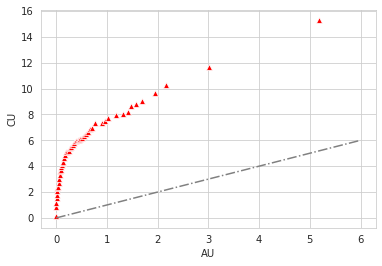

In [0]:
# Plotagem do Q-Q Plot Cu x Au
x = np.linspace(0, 6, num=50)
plt.figure (figsize = (6,4))
sns.scatterplot (AU_q, CU_q, marker = '^', color = 'Red').plot (x, x, linestyle = '-.', color = 'Gray', )
plt.show ()

### Scatterplot

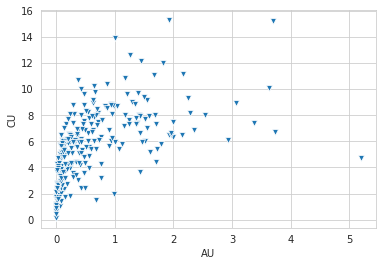

In [0]:
# Plotagem do scatterplot Cu x Au
sns.scatterplot(x="AU", y="CU", data = df, marker = 'v')
plt.show ()

### Covariância

- A matriz de covariância **C (Au, Cu)** retornada apresenta nas posiçoes C11 e C22 as variâncias de Au e Cu, respectivamente;
- A covariância entre Au e Cu é **Cov (Au, Cu) = 1.13**.

In [0]:
# Cálculo da matriz de covariância entre Au e Cu
print ('A covariância entre Au e Cu é 1.13.')
np.cov (df.AU, df.CU).round (2)

A covariância entre Au e Cu é 1.13.


array([[0.59, 1.13],
       [1.13, 7.3 ]])

### Correlação


#### Coeficiente de Correlação de Pearson (ρ)

- O **coeficiente de correlação de Pearson (ρ)** mede a **correlação linear** entre duas variáveis e é fortemente afetado por pontos distantes da "nuvem principal";
  - **ρ = 0.54**

In [0]:
# Cálculo da matriz de correlação, cujo cada valor é um coeficiente de correlação de Pearson
print ('O coeficiente de correlação de Pearson entre Au e Cu é 0.54.')
df [['AU', 'CU']].corr (method = 'pearson').round (2)

O coeficiente de correlação de Pearson entre Au e Cu é 0.54.


,AU,CU
AU,1.00,0.54
CU,0.54,1.00


#### Coeficiente de Correlação de Spearman (ρr)

- O **coeficiente de correlação de Spearman (ρr)** trabalha com os valores "rankeados", não é sensível a pontos muitos distantes da "nuvem principal" e **não se limita a identificar correlações lineares** apenas;
  - **ρr = 0.74**

In [0]:
# Cálculo da matriz de correlação, cujo cada valor é um coeficiente de correlação de Spearman
print ('O coeficiente de correlação de Spearman entre Au e Cu é 0.74.')
df [['AU', 'CU']].corr (method = 'spearman').round (2)

O coeficiente de correlação de Spearman entre Au e Cu é 0.74.


,AU,CU
AU,1.00,0.74
CU,0.74,1.00


### Discussão - Estatística Bivariada

#### Similitude das formas de distribuição de Au e Cu

- O **Q-Q Plot entre Au e Cu** mostra que essas variáveis apresentam uma **grande diferença** entre suas formas de distribuição de probabilidade, fato evidenciado pela grande distância da curva resultante em relação à reta Cu = Au;
- A curva resultante mostra que os quantis de Cu são maiores que os quantis de Au, ou seja, os **teores de Cu tendem a ser maiores que os teores de Au**;
- A diferença entre as distribuições de probabilidade de Au e Cu atesta que ambos pertencem a **domínios estacionários distintos**.

#### Correlação entre Au e Cu

- O scatterplot das variáveis Au e Cu mostra que esses teores crescem juntos;
- Como o contexto do depósito é **isotópico**, foi possível calcular a covariância entre Au e Cu. Essas variáveis **aparentam** apresentar uma **fraca covariância positiva**;
- A comparação entre o coeficiente de correlação de Pearson e o coeficiente de correlação de Spearman mostra que os teores de Au e Cu apresentam uma **correlação positiva que não aparenta ser linear**, visto que **ρ < ρr**.